In [11]:
import pandas as pd
from pathlib import Path


In [16]:
# Load the data
file_path = Path('Resources/tedsd_puf_2019.csv')
df = pd.read_csv(file_path)

df.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [17]:
count_row = df.shape[0]  # Gives number of rows
print(count_row)
y = df['CASEID']

1722503


In [18]:
df.dtypes
for column in df:
    print(column)

DISYR
CASEID
STFIPS
CBSA2010
EDUC
MARSTAT
SERVICES
DETCRIM
LOS
PSOURCE
NOPRIOR
ARRESTS
EMPLOY
METHUSE
PSYPROB
PREG
GENDER
VET
LIVARAG
DAYWAIT
SERVICES_D
REASON
EMPLOY_D
LIVARAG_D
ARRESTS_D
DSMCRIT
AGE
RACE
ETHNIC
DETNLF
DETNLF_D
PRIMINC
SUB1
SUB2
SUB3
SUB1_D
SUB2_D
SUB3_D
ROUTE1
ROUTE2
ROUTE3
FREQ1
FREQ2
FREQ3
FREQ1_D
FREQ2_D
FREQ3_D
FRSTUSE1
FRSTUSE2
FRSTUSE3
HLTHINS
PRIMPAY
FREQ_ATND_SELF_HELP
FREQ_ATND_SELF_HELP_D
ALCFLG
COKEFLG
MARFLG
HERFLG
METHFLG
OPSYNFLG
PCPFLG
HALLFLG
MTHAMFLG
AMPHFLG
STIMFLG
BENZFLG
TRNQFLG
BARBFLG
SEDHPFLG
INHFLG
OTCFLG
OTHERFLG
DIVISION
REGION
IDU
ALCDRUG


In [21]:
df['LOS'].value_counts()


1     260581
33    140555
36    128974
34    114387
35    114266
31    111830
37     93500
32     84332
2      76837
3      64662
4      59844
5      56538
6      37461
7      33615
14     26575
28     26155
8      25518
15     19530
29     19057
21     18222
9      17296
13     16679
22     15384
10     15080
27     14217
30     13464
11     12884
20     12734
12     12658
16     12327
17     10605
23     10351
19      9855
18      9559
26      9299
24      9122
25      8550
Name: LOS, dtype: int64

array([[<AxesSubplot:title={'center':'LOS'}>,
        <AxesSubplot:title={'center':'REASON'}>]], dtype=object)

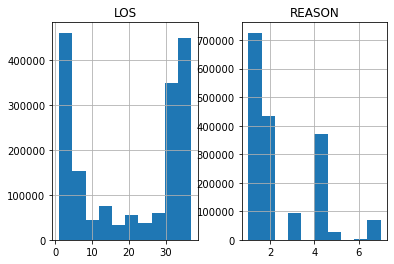

In [25]:
import matplotlib
import numpy as np
los_reason_df = df.filter(items=['LOS', 'REASON'])
los_reason_df.hist()

In [29]:
los_reason_df.head()

,LOS,REASON
0,37,1
1,35,3
2,35,3
3,37,1
4,37,3


array([[<AxesSubplot:title={'center':'LOS'}>,
        <AxesSubplot:title={'center':'REASON'}>]], dtype=object)

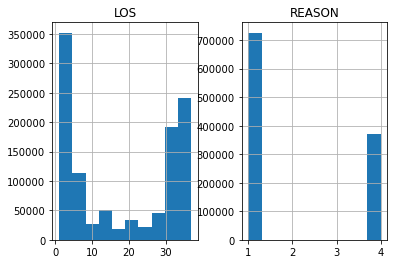

In [41]:
los_treatment_completed = los_reason_df[(los_reason_df.REASON == 1) | (los_reason_df.REASON == 4)]
los_treatment_completed.hist()

array([[<AxesSubplot:title={'center':'LOS'}>,
        <AxesSubplot:title={'center':'REASON'}>]], dtype=object)

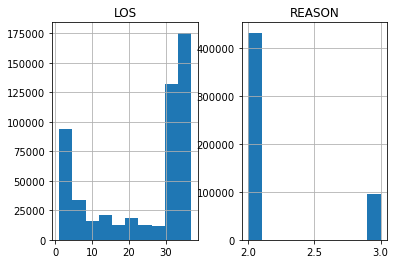

In [42]:
# Length of stay for not completing treatment for 2 (Dropped out) or 3 (Terminated by facility)
los_treatment_not_completed = los_reason_df[(los_reason_df.REASON == 2) | (los_reason_df.REASON == 3)]
los_treatment_not_completed.hist()

array([[<AxesSubplot:title={'center':'LOS'}>,
        <AxesSubplot:title={'center':'REASON'}>]], dtype=object)

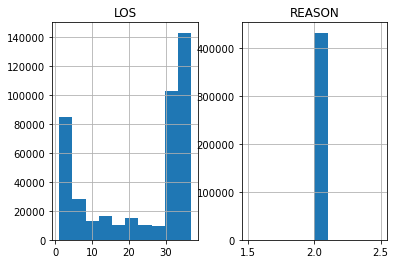

In [43]:
# Length of stay for not completing treatment for 2 (Dropped out)
los_treatment_not_completed_2 = los_reason_df[(los_reason_df.REASON == 2)]
los_treatment_not_completed_2.hist()

In [46]:
ted_variables = ['CASEID', 'AGE', 'RACE', 'ETHNIC', 'EDUC', 'MARSTAT', 'PRIMINC', 'PRIMPAY', 'EMPLOY', 'EMPLOY_D', 'DSMCRIT', 'LOS', 'REASON']

teds_reduced_df = df[ted_variables]
teds_reduced_df.head()

,CASEID,AGE,RACE,ETHNIC,EDUC,MARSTAT,PRIMINC,PRIMPAY,EMPLOY,EMPLOY_D,DSMCRIT,LOS,REASON
0,20191553576,4,1,4,4,1,1,7,2,2,19,37,1
1,20191465214,5,1,4,3,1,1,7,1,1,4,35,3
2,20191443889,1,8,4,2,1,4,4,4,4,19,35,3
3,20191409377,5,1,4,3,1,4,7,3,3,4,37,1
4,20191479567,11,8,4,3,3,4,7,4,4,4,37,3


In [49]:
teds_reduced_df.shape[0]

1722503

In [51]:
teds_reduced_df.dtypes

CASEID      int64
AGE         int64
RACE        int64
ETHNIC      int64
EDUC        int64
MARSTAT     int64
PRIMINC     int64
PRIMPAY     int64
EMPLOY      int64
EMPLOY_D    int64
DSMCRIT     int64
LOS         int64
REASON      int64
dtype: object

In [54]:
output_path = Path('Resources/teds_2019_reduced.csv')
teds_reduced_df.to_csv(output_path, encoding='utf-8', index=False)